In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
sns.set(style="ticks")

In [2]:
ecommerce=pd.read_csv('2020-Apr.csv')
ecommerce.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc
5,2020-04-01 00:00:03 UTC,view,100068493,2232732093077520756,construction.tools.light,samsung,319.41,635165435,861f2378-076f-4ddd-85e3-9844923d03a9
6,2020-04-01 00:00:04 UTC,view,8901579,2232732085150286011,computers.desktop,NaN,25.46,527795927,2956848d-5695-4169-ab6d-e2d8ed057295
7,2020-04-01 00:00:05 UTC,view,1201295,2232732101407408685,apparel.shoes.slipons,apple,489.05,635165586,48d05455-e287-4c44-84f9-76621e02b612
8,2020-04-01 00:00:06 UTC,view,3601036,2232732092297380188,appliances.kitchen.washer,whirlpool,434.99,610738477,6b42dbd6-279e-4a2d-bc7c-00e43454cdd8
9,2020-04-01 00:00:07 UTC,view,100158887,2053013561587794682,electronics.clocks,NaN,122.29,601154152,0f46540a-834f-4433-aacc-180768395c3b


In [3]:
ecommerce_limpio=ecommerce.drop(['product_id', 'category_id', 'user_id', 'user_session'], axis=1)
ecommerce_limpio

,event_time,event_type,category_code,brand,price
0,2020-04-01 00:00:00 UTC,view,apparel.shoes.slipons,samsung,230.38
1,2020-04-01 00:00:01 UTC,view,electronics.audio.headphone,apple,1352.67
2,2020-04-01 00:00:01 UTC,view,appliances.kitchen.refrigerators,apple,1184.05
3,2020-04-01 00:00:02 UTC,view,electronics.audio.headphone,apple,1724.34
4,2020-04-01 00:00:03 UTC,view,apparel.scarf,defender,25.05
...,...,...,...,...,...
66589263,2020-04-30 23:59:59 UTC,view,construction.tools.light,apple,900.90
66589264,2020-04-30 23:59:59 UTC,view,construction.tools.light,apple,1599.78
66589265,2020-04-30 23:59:59 UTC,view,apparel.shirt,defacto,12.84
66589266,2020-04-30 23:59:59 UTC,view,appliances.kitchen.toster,cube,1956.03


In [4]:
#Eliminamos las filas con valores nulos (NaN)
ecommerce_limpio_nan = ecommerce_limpio.dropna()
ecommerce_limpio_nan

,event_time,event_type,category_code,brand,price
0,2020-04-01 00:00:00 UTC,view,apparel.shoes.slipons,samsung,230.38
1,2020-04-01 00:00:01 UTC,view,electronics.audio.headphone,apple,1352.67
2,2020-04-01 00:00:01 UTC,view,appliances.kitchen.refrigerators,apple,1184.05
3,2020-04-01 00:00:02 UTC,view,electronics.audio.headphone,apple,1724.34
4,2020-04-01 00:00:03 UTC,view,apparel.scarf,defender,25.05
...,...,...,...,...,...
66589263,2020-04-30 23:59:59 UTC,view,construction.tools.light,apple,900.90
66589264,2020-04-30 23:59:59 UTC,view,construction.tools.light,apple,1599.78
66589265,2020-04-30 23:59:59 UTC,view,apparel.shirt,defacto,12.84
66589266,2020-04-30 23:59:59 UTC,view,appliances.kitchen.toster,cube,1956.03


# PRODUCTOS MÁS COMPRADOS

In [5]:
compras = ecommerce_limpio_nan['event_type'] == 'purchase'
df_compras = ecommerce_limpio_nan[compras]

In [6]:
x = df_compras.category_code
productos_vendidos = Counter(x)

In [7]:
# convert the dictionary to a DataFrame
df_productos_vendidos = pd.DataFrame.from_dict(productos_vendidos, orient='index')
#Y ordenamos.
df_productos_vendidos = df_productos_vendidos[0].sort_values(ascending = False)
df_productos_vendidos.head(20)

construction.tools.light                  370198
electronics.audio.headphone                37626
sport.bicycle                              36408
appliances.personal.massager               35993
appliances.environment.vacuum              21238
apparel.shoes                              19562
appliances.kitchen.refrigerators           19110
electronics.clocks                         17216
appliances.kitchen.washer                  13365
appliances.kitchen.toster                  12003
furniture.kitchen.table                    11924
appliances.personal.hair_cutter            11516
apparel.shoes.slipons                      10493
appliances.kitchen.blender                  9678
furniture.bedroom.blanket                   9238
kids.swing                                  8630
appliances.kitchen.oven                     8144
appliances.kitchen.mixer                    7762
electronics.camera.photo                    6324
appliances.environment.air_conditioner      5702
Name: 0, dtype: int6

Text(0.5, 1.0, '10 productos más vendidos')

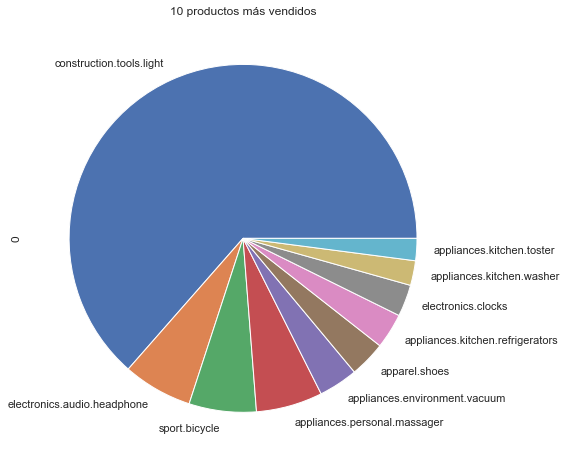

In [8]:
df_productos_vendidos.head(10).plot(kind='pie', subplots=True, figsize=(16,8))
plt.title("10 productos más vendidos")

In [9]:
df_productos_vendidos.tail(20)

country_yard.lawn_mower                35
auto.accessories.light                 34
auto.accessories.parktronic            30
computers.components.videocards        27
apparel.skirt                          24
computers.components.cdrw              21
furniture.bathroom.toilet              18
appliances.iron                        16
appliances.kitchen.microwave           16
apparel.dress                           7
appliances.environment.water_heater     7
stationery.paper                        5
electronics.audio.dictaphone            5
computers.peripherals.keyboard          4
computers.components.memory             3
auto.accessories.player                 2
computers.peripherals.monitor           2
appliances.kitchen.coffee_machine       2
appliances.kitchen.steam_cooker         1
construction.tools.soldering            1
Name: 0, dtype: int64

Text(0.5, 1.0, '10 productos menos vendidos')

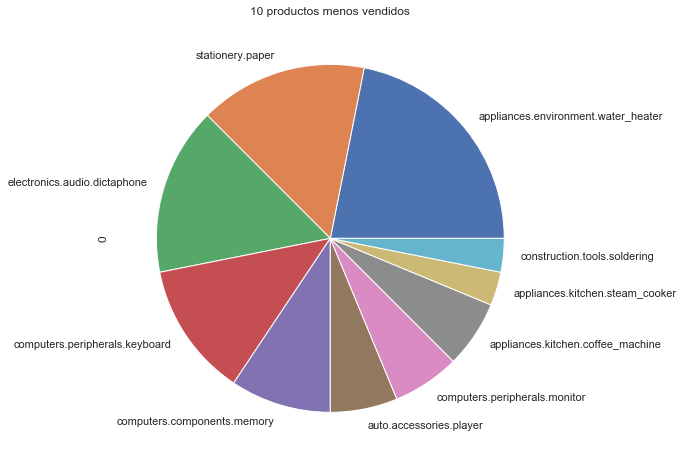

In [10]:
df_productos_vendidos.tail(10).plot(kind='pie', subplots=True, figsize=(16,8))
plt.title("10 productos menos vendidos")

# HORAS Y DIAS EN CUANTO A COMPRAS

In [11]:
#DataFrame SÓLO con compras (purchase) CON valores nulos.
compras_nan = ecommerce_limpio['event_type'] == 'purchase'
df_compras_nan = ecommerce_limpio[compras_nan]

In [12]:
#DataFrame SÓLO con visualizaciones (views)
visualizaciones = ecommerce_limpio['event_type'] == 'view'
df_visualizaciones = ecommerce_limpio[visualizaciones]

In [13]:
df_compras_nan['event_time'] = df_compras_nan['event_time'].str.slice_replace(19, 24, '')

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_compras_nan['event_time']=pd.to_datetime(df_compras_nan['event_time'])

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_compras_nan.set_index('event_time', inplace=True)

In [16]:
dias=df_compras_nan.resample('d').count()

In [17]:
dias['index1'] = dias.index

In [40]:
z=dias.groupby([dias.index.day]).mean()
z

,event_type,category_code,brand,price
event_time,,,,
1,27250,25442,25541,27250
2,29639,27693,27794,29639
3,28900,27056,27164,28900
4,25449,23618,23730,25449
5,23845,22098,22117,23845
6,25050,23264,23283,25050
7,24045,22413,22421,24045
8,25544,23880,23813,25544
9,26410,24573,24485,26410


In [19]:
z['index1'] = z.index

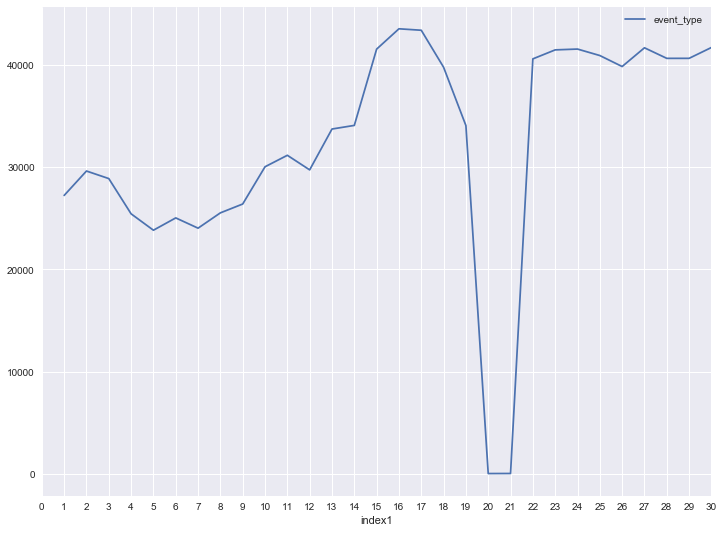

In [39]:
plt.style.use('seaborn')
z.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9))
plt.xticks(np.arange(0,31,1))
plt.show()

# COMPRAS HORAS

In [21]:
df_compras_horas=df_compras_nan.resample('h').count()

In [22]:
x2=df_compras_horas.groupby([df_compras_horas.index.hour]).mean()

In [23]:
x2['index1'] = x2.index

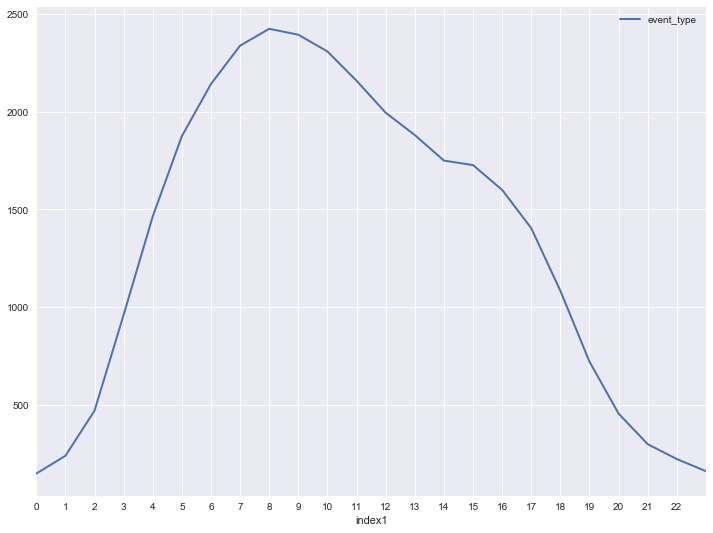

In [24]:
plt.style.use('seaborn')
x2.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9), linewidth=2 )
plt.xticks(np.arange(0,23,1))
plt.show()

# DIAS VISUALIZACIONES

In [25]:
df_visualizaciones['event_time'] = df_visualizaciones['event_time'].str.slice_replace(19, 24, '')

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_visualizaciones['event_time']=pd.to_datetime(df_visualizaciones['event_time'])

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_visualizaciones.set_index('event_time', inplace=True)

In [28]:
dias_visualizaciones=df_visualizaciones.resample('d').count()

In [29]:
dias_visualizaciones['index1'] = dias_visualizaciones.index

In [30]:
y=dias_visualizaciones.groupby([dias_visualizaciones.index.day]).mean()

In [31]:
y['index1'] = y.index

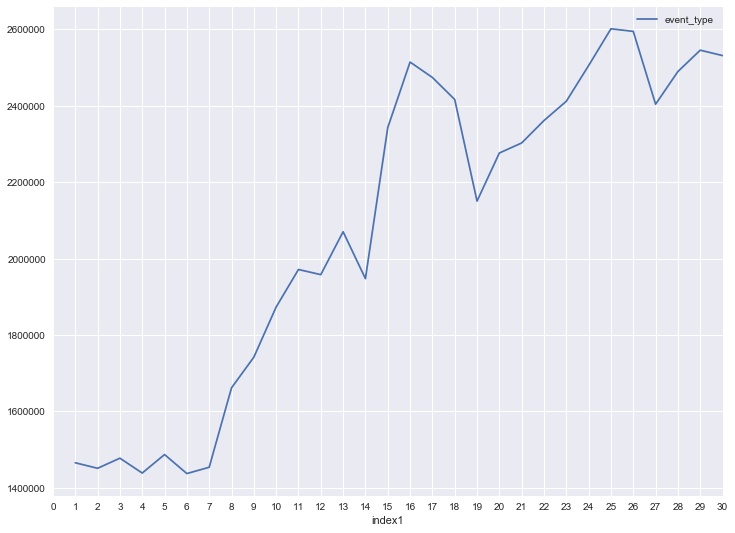

In [32]:
plt.style.use('seaborn')
y.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9))
plt.xticks(np.arange(0,31,1))
plt.show()

# HORAS VISUALIZACIONES

In [34]:
df_quitar_dias=df_visualizaciones

In [35]:
df_quitar_dias=df_quitar_dias.resample('h').count()

In [36]:
x=df_quitar_dias.groupby([df_quitar_dias.index.hour]).mean()

In [37]:
x['index1'] = x.index

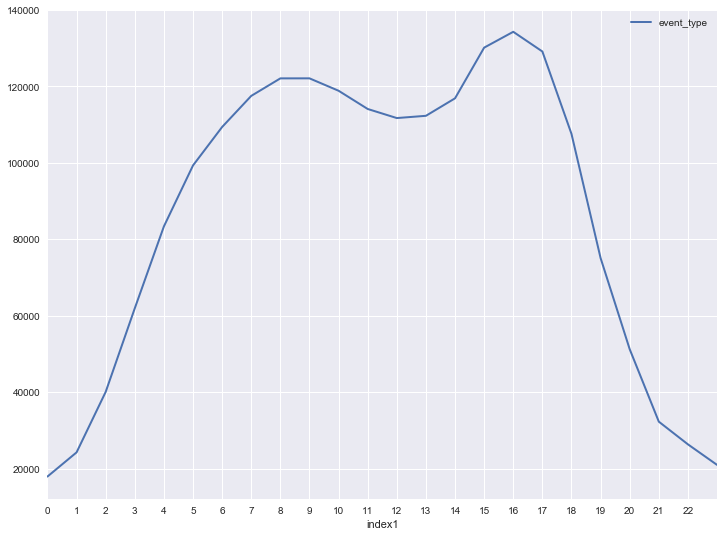

In [38]:
plt.style.use('seaborn')
x.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9), linewidth=2 )
plt.xticks(np.arange(0,23,1))
plt.show()